In [4]:
def Bisection(f, a, b, tol=1.e-6):
    """
    Implements the Bisection method for finding a root of the equation f(x) = 0.

    Parameters:
    f (function): The function for which we are trying to find a root.
    a (float): The lower bound of the interval [a, b].
    b (float): The upper bound of the interval [a, b].
    tol (float, optional): The stopping criterion based on the interval width. Default is 1.e-6.

    Returns:
    float: The approximate root of the function f(x) = 0 within the interval [a, b].

    Raises:
    ValueError: If f(a) and f(b) do not have opposite signs, indicating that a root is not guaranteed in [a, b].

    Example:
    >>> def f(x):
    >>>     return x**2 - 4
    >>> root = Bisection(f, 1, 3)
    >>> print(root)
    2.0
    """

    # Check if the function values at a and b have opposite signs
    if f(a) * f(b) > 0:
        raise ValueError("f(a) and f(b) must have opposite signs to ensure a root exists in the interval.")

    while abs(b - a) > tol:
        # Compute the midpoint of the interval
        c = (a + b) / 2.0

        # Check if the function value at c is sufficiently close to zero
        if f(c) == 0 or abs(b - a) < tol:
            return c  # Return the estimated root

        # Update the interval based on the sign of f(c)
        if f(a) * f(c) < 0:
            b = c  # The root lies between a and c
        else:
            a = c  # The root lies between c and b

    return (a + b) / 2.0  # Return the midpoint as the final approximation



In [28]:

def BisectionErrors(f, a, b, tol=1.e-6, solution=None):
    """
    Implements the Bisection method for finding a root of the function f in the interval [a, b]. 
    Optionally, it tracks the error relative to a known solution.

    Parameters:
    f (function): The function for which the root is sought.
    a (float): The left endpoint of the interval.
    b (float): The right endpoint of the interval.
    tol (float, optional): The stopping criterion based on the interval width. Default is 1.e-6.
    solution (float, optional): The known root of f, used to compute error tracking. Default is None.

    Returns:
    float: The estimated root of f if solution is None.
    tuple: (root, errors) if solution is provided, where errors is a list of absolute errors.

    Raises:
    ValueError: If f(a) and f(b) do not have opposite signs (i.e., no guarantee of a root in [a, b]).

    Example:
    >>> def f(x):
    >>>     return x**2 - 4
    >>> root, errors = BisectionErrors(f, 1, 3, solution=2)
    >>> print(root, errors)
    2.0 [error values...]
    """

    # Check if the function values at a and b have opposite signs
    if f(a) * f(b) > 0:
        raise ValueError("f(a) and f(b) must have opposite signs to ensure a root exists in the interval.")

    # Initialize the error tracking list if a known solution is provided
    if solution is not None:
        errors = []

    while True:
        # Compute the midpoint of the interval
        c = (a + b) / 2.0

        # Store the error if a known solution is provided
        if solution is not None:
            errors.append(abs(c - solution))

        # Check if the function value at c is sufficiently close to zero
        if f(c) == 0 or abs((b - a)/2) < tol:
            if solution is None:
                #print("Root found within tolerance - version 1.")
                return c  # Return the estimated root
            else:
                #print("Root found within tolerance.")
                return c, errors  # Return the root along with error tracking

        # Update the interval based on the sign of f(c)
        if f(a) * f(c) < 0:
            b = c  # The root lies between a and c
        else:
            a = c  # The root lies between c and b


In [29]:
f = lambda x: x**2 - 2
root, errors = BisectionErrors(f, 1, 2, solution=2**0.5)


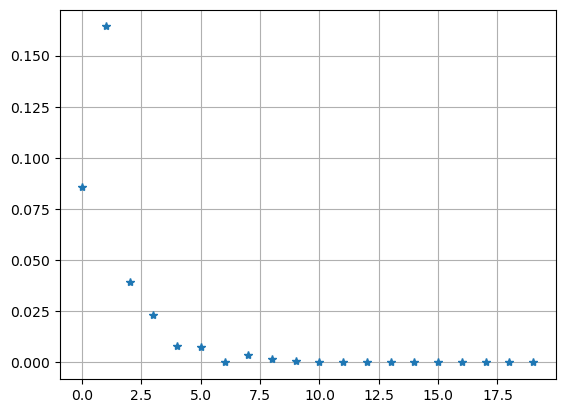

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(errors)), errors,'*')
plt.xlabel('Iteration')
plt.ylabel('Absolute Error')
plt.grid(True)  

In [ ]:
log_errors = np.log2(errors)
iterations = range(len(errors))


In [8]:
err = [4,3,2,1]
err[1:]

[3, 2, 1]

Estimated root: 1.4142136573791504


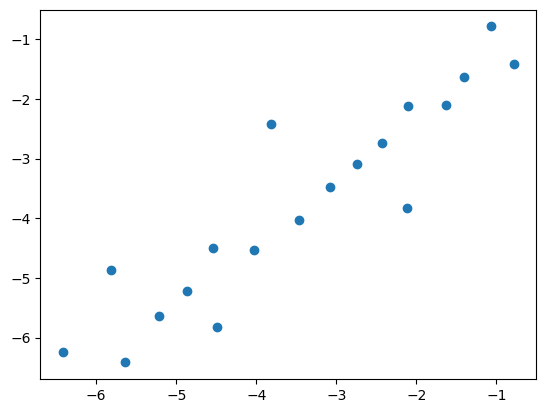

In [10]:

print(f"Estimated root: {root}")

log10errors = np.log10(errors)

import matplotlib.pyplot as plt

plt.plot( log10errors[:-1], log10errors[1:], 'o' )

In [17]:
def RegulaFalsi(f, a, b, tol=1.e-6):
    """
    Implements the Regula Falsi (False Position) method for finding a root of the equation f(x) = 0.

    Parameters:
    f (function): The function for which we are trying to find a root.
    a (float): The lower bound of the interval [a, b].
    b (float): The upper bound of the interval [a, b].
    tol (float, optional): The stopping criterion based on the distance 
                        between successive approximations. Default is 1.e-6.

    Returns:
    float: The approximate root of the function f(x) = 0 within the interval [a, b].

    Raises:
    ValueError: If f(a) and f(b) do not have opposite signs, indicating that a root is not guaranteed in [a, b].

    Example:
    >>> def f(x):
    >>>     return x**2 - 4
    >>> root = RegulaFalsi(f, 1, 3)
    >>> print(root)
    2.0
    """

    # Check if the function values at a and b have opposite signs
    if f(a) * f(b) > 0:
        raise ValueError("f(a) and f(b) must have opposite signs to ensure a root exists in the interval.")

    c_prev = a

    while True:

        # Compute the false position (Regula Falsi) estimate for the root
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))

        # Check if the function value at c is sufficiently close to zero or if the interval is small
        if f(c) == 0 or abs(c_prev-c) < tol:
            return c  # Return the estimated root

        # Update the interval based on the sign of f(c)
        if f(a) * f(c) < 0:
            b = c  # The root lies between a and c
        else:
            a = c  # The root lies between c and b

        c_prev = c


In [ ]:
def RegulaFalsi_Method(f, a, b, tol=1.e-6, solution=None):
    """
    Implements the Regula Falsi (False Position) method for finding a root of the equation f(x) = 0.

    Parameters:
    f (function): The function for which we are trying to find a root.
    a (float): The lower bound of the interval [a, b].
    b (float): The upper bound of the interval [a, b].
    tol (float, optional): The stopping criterion based on the distance 
                        between successive approximations. Default is 1.e-6.

    Returns:
    float: The approximate root of the function f(x) = 0 within the interval [a, b].

    Raises:
    ValueError: If f(a) and f(b) do not have opposite signs, indicating that a root is not guaranteed in [a, b].

    Example:
    >>> def f(x):
    >>>     return x**2 - 4
    >>> root = RegulaFalsi(f, 1, 3)
    >>> print(root)
    2.0
    """

    # Check if the function values at a and b have opposite signs
    if f(a) * f(b) > 0:
        raise ValueError("f(a) and f(b) must have opposite signs to ensure a root exists in the interval.")

    # Initialize the error tracking list if a known solution is provided
    if solution is not None:
        errors = []

    # Initialize the previous estimate for the root
    c_prev = a

    while True:

        # Compute the false position (Regula Falsi) estimate for the root
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))

        # Check if the function value at c is sufficiently close to zero 
        # or if successive approximations are close enough
        if f(c) == 0 or abs(c_prev-c) < tol:
            if solution is None:
                return c  # Return the estimated root
            else:
                return c, errors  # Return the root along with error tracking

        # Update the interval based on the sign of f(c)
        if f(a) * f(c) < 0:
            b = c  # The root lies between a and c
        else:
            a = c  # The root lies between c and b

        c_prev = c


In [18]:
f = lambda x: x**2 - 2
root = RegulaFalsi(f, 1, 2)
print(f"Estimated root: {root}")


b-a: 1, c:1.3333333333333333, error: -0.08088022903976189
b-a: 0.6666666666666667, c:1.4, error: -0.014213562373095234
b-a: 0.6000000000000001, c:1.411764705882353, error: -0.002448856490742113
b-a: 0.588235294117647, c:1.4137931034482758, error: -0.00042045892481934466
b-a: 0.5862068965517242, c:1.414141414141414, error: -7.214823168122386e-05
b-a: 0.5858585858585861, c:1.4142011834319526, error: -1.2378941142587863e-05
b-a: 0.5857988165680474, c:1.41421143847487, error: -2.1238982250704197e-06
b-a: 0.5857885615251299, c:1.4142131979695434, error: -3.644035517780253e-07
b-a: 0.5857868020304566, c:1.4142134998513232, error: -6.252177198184938e-08
Estimated root: 1.4142134998513232


In [15]:
def Newtons_Method(f, fprime, x0, tol=1.e-6, solution=None):
    """
    Implements the Regula Falsi (False Position) method for finding a root of the equation f(x) = 0.

    Parameters:
    f (function): The function for which we are trying to find a root.
    a (float): The lower bound of the interval [a, b].
    b (float): The upper bound of the interval [a, b].
    tol (float, optional): The stopping criterion based on the distance 
                        between successive approximations. Default is 1.e-6.

    Returns:
    float: The approximate root of the function f(x) = 0 within the interval [a, b].

    Raises:
    ValueError: If f(a) and f(b) do not have opposite signs, indicating that a root is not guaranteed in [a, b].

    Example:
    >>> def f(x):
    >>>     return x**2 - 4
    >>> root = RegulaFalsi(f, 1, 3)
    >>> print(root)
    2.0
    """

    # Initialize the error tracking list if a known solution is provided
    if solution is not None:
        errors = []

    # Initialize the previous estimate for the root

    xprev = x0
    iteration = 0

    while True:

        iteration += 1

        xnew = xprev - f(xprev) / fprime(xprev)

        if solution is not None:
            errors.append(abs(xnew - solution))

        # Check if the function value at c is sufficiently close to zero 
        # or if successive approximations are close enough
        if f(xnew) == 0 or abs(xnew-xprev) < tol or iteration == 10:
            if solution is None:
                return xnew  # Return the estimated root
            else:
                return xnew, errors  # Return the root along with error tracking
            
        xprev = xnew


In [19]:
f = lambda x: x**2 - 2
fprime = lambda x: 2*x
root, errors = Newtons_Method(f, fprime, 1, tol = 1e-10, solution = 2**0.5)
print(f"Estimated root: {root}")

Estimated root: 1.4142135623730951


In [20]:
errors

[0.08578643762690485,
 0.002453104293571595,
 2.1239014147411694e-06,
 1.5947243525715749e-12,
 0.0]